In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
sns.set_theme(style='ticks', font_scale=2.0, rc={'text.usetex': True})

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['text.latex.preamble'] = r'\usepackage{lmodern}'
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [75]:
def plot_data(file_list, label):
    sorted_file_list = sorted(file_list)
    datas = []
    for file_name in sorted_file_list:
    
        n = int(file_name.split(".")[0].split("/")[-1])
        with open(file_name, 'r') as file:
            data = file.readlines()
        data = [float( x.strip() ) for x in data]
        if len(data) == 0:
            continue
        mean = np.mean(data)
        datas.append([n, mean])
        
    sorted_datas = sorted(datas, key=lambda x: x[0])
    plt.plot([x[0] for x in sorted_datas], [x[1] for x in sorted_datas], label = label)
    plt.scatter([x[0] for x in sorted_datas], [x[1] for x in sorted_datas], color='r', zorder=2, alpha=0.25)
    plt.legend()
    plt.xticks(rotation=45)
    return sorted_datas

def plot_data_nodot(file_list, label):
    sorted_file_list = sorted(file_list)
    datas = []
    for file_name in sorted_file_list:
    
        n = int(file_name.split(".")[0].split("/")[-1])
        with open(file_name, 'r') as file:
            data = file.readlines()
        data = [float( x.strip() ) for x in data]
        if len(data) == 0:
            continue
        mean = np.mean(data)
        datas.append([n, mean])
        
    sorted_datas = sorted(datas, key=lambda x: x[0])
    plt.plot([x[0] for x in sorted_datas], [x[1] for x in sorted_datas], label = label)
    plt.legend()
    plt.xticks(rotation=45)
    return sorted_datas

def get_ratio(list1, list2):
    print(len(list1), len(list2))
    return list(filter(lambda x: x < 100000, [x[1]/y[1] for x, y in zip(list1, list2)] ) )



coin toss


In [34]:
naive_fname = "hw1/coin_toss_experiment/cmake-build-debug/output/distribution/naive.txt"
count_fname = "hw1/coin_toss_experiment/cmake-build-debug/output/distribution/leading.txt"
fancy_fname = "hw1/coin_toss_experiment/cmake-build-debug/output/distribution/fancy.txt"

with open(naive_fname, 'r') as file:
    naive_data = file.readlines()


with open(count_fname, 'r') as file:
    count_data = file.readlines()

with open(fancy_fname, 'r') as file:
    fancy_fname = file.readlines()

naive_data = [int( x.strip() ) for x in naive_data]
count_data = [int( x.strip() ) for x in count_data]
fancy_data = [int( x.strip() ) for x in fancy_fname]

naive_data = np.array(naive_data)
count_data = np.array(count_data)
fancy_data = np.array(fancy_data)



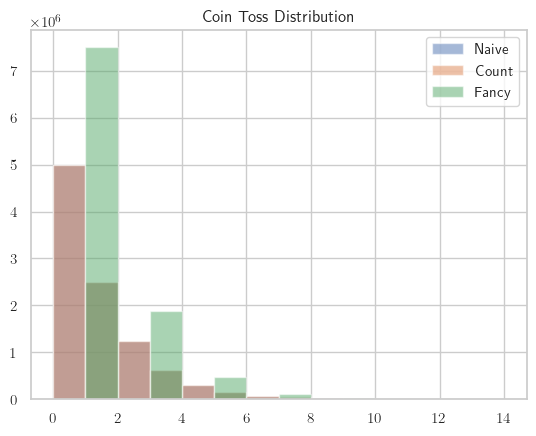

In [59]:
plt.hist(naive_data, bins=range(0, 15, 1), alpha=0.5, label='Naive')
plt.hist(count_data, bins=range(0, 15, 1), alpha=0.5, label='Count')
plt.hist(fancy_data, bins=range(0, 15, 1), alpha=0.5, label='Fancy')
plt.title('Coin Toss Distribution')
plt.legend()
plt.show()

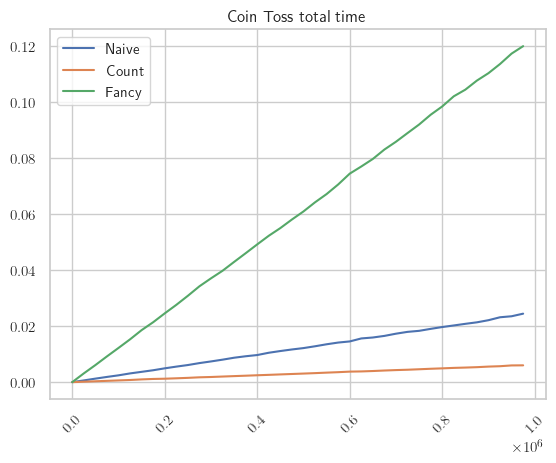

In [60]:
naive_file_list = glob.glob("hw1/coin_toss_experiment/cmake-build-debug/output/coin_naive/*.txt")  
count_file_list = glob.glob("hw1/coin_toss_experiment/cmake-build-debug/output/coin_leading/*.txt")
fancy_file_list = glob.glob("hw1/coin_toss_experiment/cmake-build-debug/output/coin_fancy/*.txt")

plot_data_nodot(naive_file_list, 'Naive')
plot_data_nodot(count_file_list, 'Count')
plot_data_nodot(fancy_file_list, 'Fancy')
plt.title('Coin Toss total time')
plt.show()

In [61]:
insert_skip_list = glob.glob("ICCS315-Applied-Algorithms/hw1/skiplist/cmake-build-debug/output/insert/*.txt")
search_skip_list = glob.glob("ICCS315-Applied-Algorithms/hw1/skiplist/cmake-build-debug/output/lookup/*.txt")
delete_skip_list = glob.glob("ICCS315-Applied-Algorithms/hw1/skiplist/cmake-build-debug/output/delete/*.txt")

insert_skip_list_base = glob.glob("ICCS315-Applied-Algorithms/hw1/skiplist/cmake-build-debug/output_base/insert/*.txt")
search_skip_list_base = glob.glob("ICCS315-Applied-Algorithms/hw1/skiplist/cmake-build-debug/output_base/lookup/*.txt")
delete_skip_list_base = glob.glob("ICCS315-Applied-Algorithms/hw1/skiplist/cmake-build-debug/output_base/delete/*.txt")

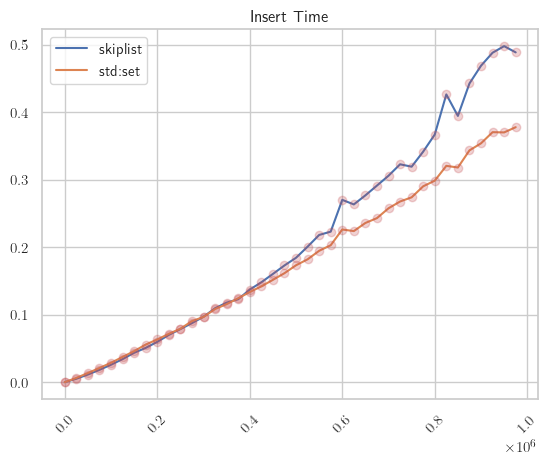

40 40
mean ratio 1.0715973159887664
std ratio 0.1849438886108054


In [77]:
ret1 = plot_data(insert_skip_list, 'skiplist')
ret2 = plot_data(insert_skip_list_base, 'std:set')
plt.title('Insert Time')
plt.show()
ratio_list = get_ratio(ret1, ret2)
print("mean ratio", np.mean(ratio_list))
print("std ratio", np.std(ratio_list))


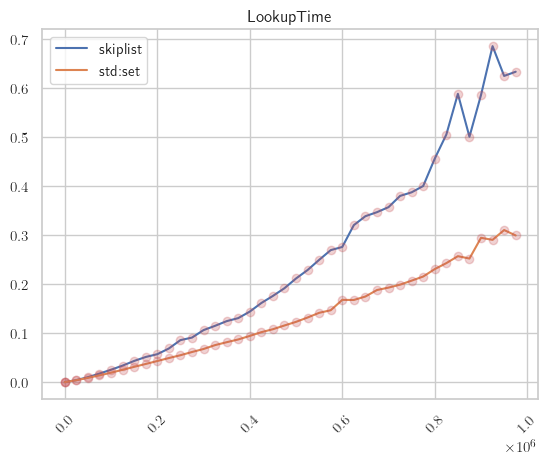

41 40
mean ratio 1.4719213178142758
std ratio 0.47031048329179453


In [79]:
ret1 = plot_data(search_skip_list, 'skiplist')
ret2 = plot_data(search_skip_list_base, 'std:set')
plt.title('LookupTime')
plt.show()

ratio_list = get_ratio(ret1, ret2)
print("mean ratio", np.mean(ratio_list))
print("std ratio", np.std(ratio_list))



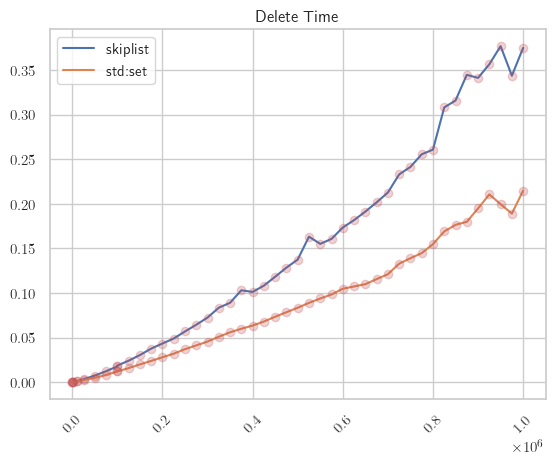

45 44
mean ratio 1.3829115319683472
std ratio 0.4414656437763758


In [78]:
ret1 = plot_data(delete_skip_list, 'skiplist')
ret2 = plot_data(delete_skip_list_base, 'std:set')
plt.title('Delete Time')
plt.show()

ratio_list = get_ratio(ret1, ret2)
print("mean ratio", np.mean(ratio_list))
print("std ratio", np.std(ratio_list))

In [90]:
insert_skip_list_better = glob.glob("hw1/skiplistv2/cmake-build-debug/output/insert/*.txt")
search_skip_list_better = glob.glob("hw1/skiplistv2/cmake-build-debug/output/lookup/*.txt")
delete_skip_list_better = glob.glob("hw1/skiplistv2/cmake-build-debug/output/delete/*.txt")

insert_skip_list_base_better = glob.glob("hw1/skiplistv2/cmake-build-debug/output_base/insert/*.txt")
search_skip_list_base_better = glob.glob("hw1/skiplistv2/cmake-build-debug/output_base/lookup/*.txt")
delete_skip_list_base_better = glob.glob("hw1/skiplistv2/cmake-build-debug/output_base/delete/*.txt")

['hw1/skiplistv2/cmake-build-debug/output/insert']


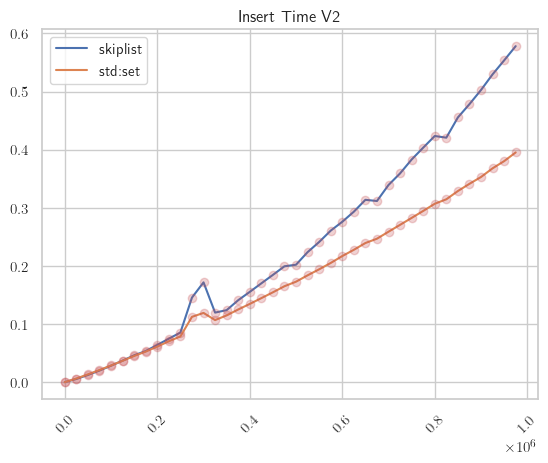

40 40
mean ratio 1.1971618958474437
std ratio 0.20146300131110342


In [86]:
ret1 = plot_data(insert_skip_list_better, 'skiplist')
ret2 = plot_data(insert_skip_list_base_better, 'std:set')
plt.title('Insert Time V2')
plt.show()
ratio_list = get_ratio(ret1, ret2)
print("mean ratio", np.mean(ratio_list))
print("std ratio", np.std(ratio_list))

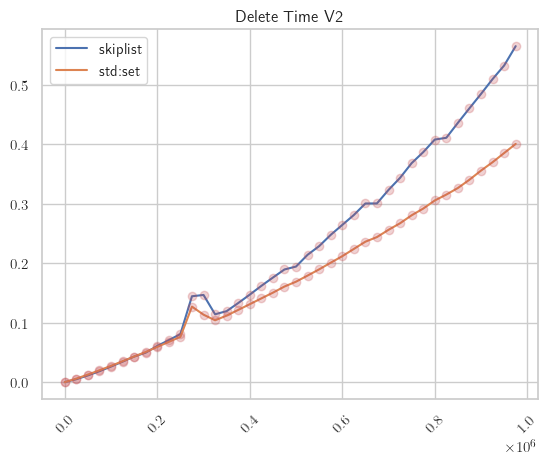

40 40
mean ratio 1.153413902632638
std ratio 0.20106427173470828


In [87]:
ret1 = plot_data(delete_skip_list_better, 'skiplist')
ret2 = plot_data(delete_skip_list_base_better, 'std:set')
plt.title('Delete Time V2')
plt.show()
ratio_list = get_ratio(ret1, ret2)
print("mean ratio", np.mean(ratio_list))
print("std ratio", np.std(ratio_list))


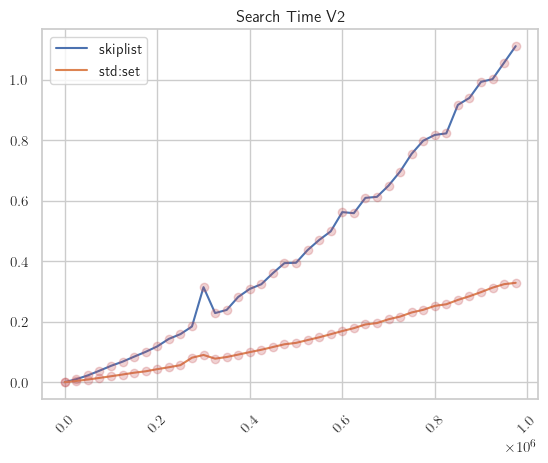

40 40
mean ratio 2.9783794619035384
std ratio 0.4984159111599234


In [92]:
ret1 = plot_data(search_skip_list_better, 'skiplist')
ret2 = plot_data(search_skip_list_base_better, 'std:set')
plt.title('Search Time V2')
plt.show()
ratio_list = get_ratio(ret1, ret2)


print("mean ratio", np.mean(ratio_list))
print("std ratio", np.std(ratio_list))


In [146]:
import json

# Sample JSON file path
file_path = 'b_tree_find_b.json'

# Open and load the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract the benchmark data
benchmarks = data.get('benchmarks', [])

In [147]:
xs = []
ys_real_time = []
ys_ram_usage = []
for benchmark in benchmarks:
    n = benchmark['name'].split('>')[0].split("<")[1]
    xs.append(n)
    ys_real_time.append(benchmark['real_time'])
    ys_ram_usage.append(benchmark['RAM'])

ys_real_time_ms = np.array(ys_real_time) / 1e6
df = pd.DataFrame({'real_time(ms)': ys_real_time_ms, 'RAM': ys_ram_usage})
df.set_index(pd.Index(xs), inplace=True)
df




,real_time(ms),RAM
2,31939.290542,856032.0
5,9083.872041,352784.0
10,4923.225167,210384.0
16,4217.503834,171600.0
28,3364.558875,148896.0
32,3303.580792,143040.0
34,3263.682459,141568.0
36,3381.112500,140640.0
48,3340.207584,133488.0
50,3209.462250,133088.0


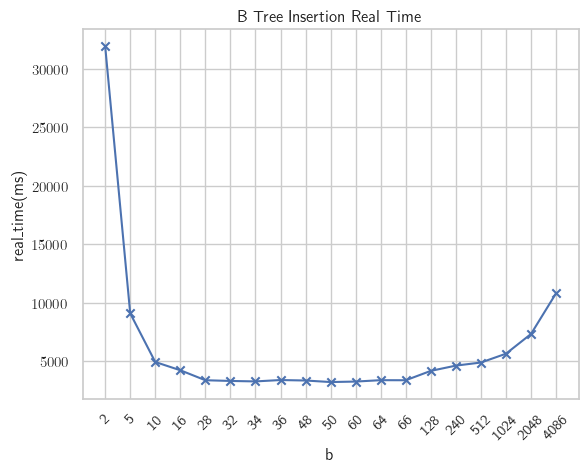

In [149]:
plt.plot(xs, ys_real_time_ms, label='real_time(ms)')
plt.scatter(xs, ys_real_time_ms, label='real_time(ms)', marker='x')
plt.xlabel('b')
plt.ylabel('real_time(ms)')
plt.title('B Tree Insertion Real Time')
plt.xticks(rotation=45)
plt.show()

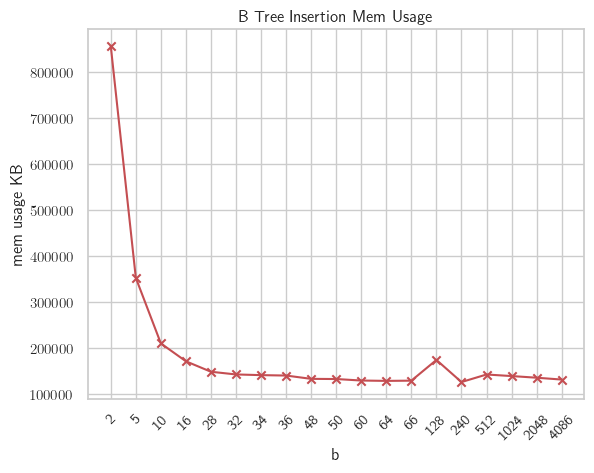

In [150]:

plt.plot(xs, ys_ram_usage, label='RAM', color = 'r')
plt.scatter(xs, ys_ram_usage, label='RAM', marker='x', color='r')
plt.xlabel('b')
plt.ylabel('mem usage KB')
plt.title('B Tree Insertion Mem Usage')
plt.xticks(rotation=45)
plt.show()

In [165]:

file_path = 'comparison.json'


with open(file_path, 'r') as file:
    data = json.load(file)


benchmarks = data.get('benchmarks', [])

xs_tree = []
xs_set = []

ys_real_time_tree = []
ys_real_time_set = []

ys_ram_usage_tree= []
ys_ram_usage_set = []

for benchmark in benchmarks:
    n = benchmark['name'].split('/')[1]
    name = benchmark['name'].split('/')[0]
    
    if 'B'  in name:
        xs_tree.append(n)
        ys_real_time_tree.append(benchmark['real_time'])
        ys_ram_usage_tree.append(benchmark['RAM'])
    else:
        xs_set.append(n)
        ys_real_time_set.append(benchmark['real_time'])
        ys_ram_usage_set.append(benchmark['RAM'])
        



ys_real_time_ms_tree = np.array(ys_real_time_tree) / 1e6
ys_real_time_ms_set = np.array(ys_real_time_set) / 1e6

df1 = pd.DataFrame({'real_time(ms)': ys_real_time_ms_tree, 'RAM': ys_ram_usage_tree})
df1.set_index(pd.Index(xs_tree), inplace=True)

df2 = pd.DataFrame({'real_time(ms)': ys_real_time_ms_set, 'RAM': ys_ram_usage_set})
df2.set_index(pd.Index(xs_set), inplace=True)



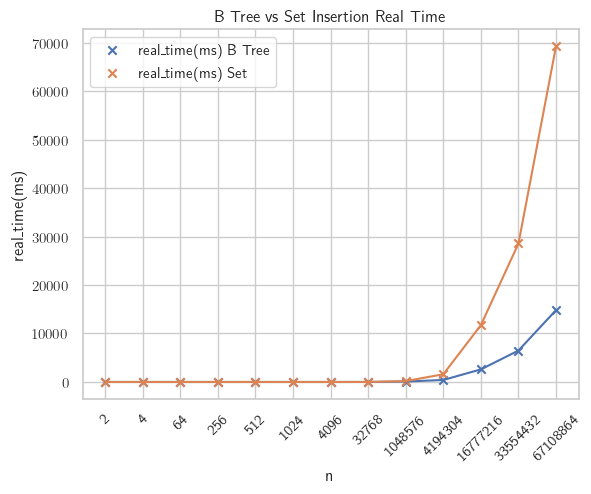

In [166]:
plt.plot(xs_tree, ys_real_time_ms_tree)
plt.scatter(xs_tree, ys_real_time_ms_tree, label='real_time(ms) B Tree', marker='x')
plt.plot(xs_set, ys_real_time_ms_set)
plt.scatter(xs_set, ys_real_time_ms_set, label='real_time(ms) Set', marker='x')
plt.xlabel('n')
plt.ylabel('real_time(ms)')
plt.title('B Tree vs Set Insertion Real Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [167]:
df1

,real_time(ms),RAM
2,0.002875,0.0
4,0.000916,0.0
64,0.002042,0.0
256,0.009209,0.0
512,0.018542,0.0
1024,0.039208,16.0
4096,0.178917,16.0
32768,1.767459,208.0
1048576,86.339250,6752.0
4194304,415.227250,27168.0


In [168]:
df2

,real_time(ms),RAM
2,0.001375,0.0
4,0.000792,0.0
64,0.003250,0.0
256,0.011834,0.0
512,0.024042,0.0
1024,0.052583,16.0
4096,0.265000,96.0
32768,2.953416,896.0
1048576,185.682542,31792.0
4194304,1593.170291,98496.0


In [164]:
# plt.plot(xs_tree, ys_ram_usage_tree)
# plt.scatter(xs_tree, ys_ram_usage_tree ,label='B Tree', marker='x')
# plt.plot(xs_set, ys_ram_usage_set)
# plt.scatter(xs_set, ys_ram_usage_set, label='Set', marker='x')
# plt.xlabel('n')
# plt.ylabel('KB')
# plt.title('B Tree vs Set Insertion memory usage')
# plt.xticks(rotation=45)
# plt.legend()
# plt.show()

In [170]:

file_path = 'comparison_lookup.json'


with open(file_path, 'r') as file:
    data = json.load(file)


benchmarks = data.get('benchmarks', [])

xs_tree = []
xs_set = []

ys_real_time_tree = []
ys_real_time_set = []

ys_ram_usage_tree= []
ys_ram_usage_set = []

for benchmark in benchmarks:
    n = benchmark['name'].split('/')[1]
    name = benchmark['name'].split('/')[0]
    
    if 'B'  in name:
        xs_tree.append(n)
        ys_real_time_tree.append(benchmark['real_time'])
        ys_ram_usage_tree.append(benchmark['RAM'])
    else:
        xs_set.append(n)
        ys_real_time_set.append(benchmark['real_time'])
        ys_ram_usage_set.append(benchmark['RAM'])
        



ys_real_time_ms_tree = np.array(ys_real_time_tree) / 1e6
ys_real_time_ms_set = np.array(ys_real_time_set) / 1e6

df1 = pd.DataFrame({'real_time(ms)': ys_real_time_ms_tree, 'RAM': ys_ram_usage_tree})
df1.set_index(pd.Index(xs_tree), inplace=True)

df2 = pd.DataFrame({'real_time(ms)': ys_real_time_ms_set, 'RAM': ys_ram_usage_set})
df2.set_index(pd.Index(xs_set), inplace=True)





In [171]:
df1

,real_time(ms),RAM
2,0.002959,0.0
4,0.001041,0.0
64,0.002041,0.0
256,0.006666,0.0
512,0.014958,0.0
1024,0.030292,16.0
4096,0.149042,16.0
32768,1.714333,208.0
1048576,80.889958,6784.0
4194304,430.619500,27168.0


In [172]:
df2

,real_time(ms),RAM
2,0.001292,0.0
4,0.000750,0.0
64,0.001833,0.0
256,0.005250,0.0
512,0.012042,0.0
1024,0.030750,16.0
4096,0.132084,96.0
32768,1.690708,896.0
1048576,102.177791,31792.0
4194304,692.769417,98480.0


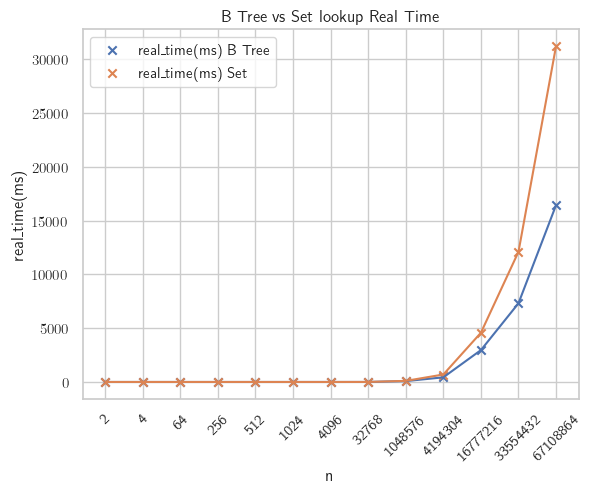

In [173]:
plt.plot(xs_tree, ys_real_time_ms_tree)
plt.scatter(xs_tree, ys_real_time_ms_tree, label='real_time(ms) B Tree', marker='x')
plt.plot(xs_set, ys_real_time_ms_set)
plt.scatter(xs_set, ys_real_time_ms_set, label='real_time(ms) Set', marker='x')
plt.xlabel('n')
plt.ylabel('real_time(ms)')
plt.title('B Tree vs Set lookup Real Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()